# AAVAIL Capstone Project - Data Analysis

This notebook is for the part 1 of the AI Workflow Capstone project.

In [1]:
# prepare environment and import needed functions and libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAINING = True

if TRAINING:
    data_dir = os.path.join("..", "capstone-w","cs-train")
else:
    data_dir = os.path.join("..", "capstone-w","cs-production")
# list training and production data files
sorted(os.listdir(data_dir))
# correct list of column names
correct_cols = sorted(['country', 'customer_id', 'invoice', 'price', 'stream_id', 
                'times_viewed', 'year', 'month', 'day'])
correct_cols

['country',
 'customer_id',
 'day',
 'invoice',
 'month',
 'price',
 'stream_id',
 'times_viewed',
 'year']

In [3]:
# load training data into pandas dataFrame
df = pd.DataFrame()
datafiles = sorted(os.listdir(data_dir))
datafiles
for file in datafiles:
    filename = os.path.join(data_dir, file)
    file_df = pd.read_json(filename,
                           dtype={'country': str, 'customer_id': str, 'invoice': str, 
                                  'price': str, 'stream_id': str, 'times_viewed': str, 
                                  'year': str, 'month': str, 'day': str})  
    # correct inconsistent column names
    cols = file_df.columns.to_list()
    if "StreamID" in cols:
        file_df.rename(columns={"StreamID": "stream_id"}, inplace=True)
    if "TimesViewed" in cols:
        file_df.rename(columns={"TimesViewed": "times_viewed"}, inplace=True)
    if "total_price" in cols:
        file_df.rename(columns={"total_price": "price"}, inplace=True)        
    if sorted(file_df.columns.to_list()) != correct_cols:
        print("column names are still different")
    print(filename)
    df = df.append(file_df)

..\capstone-w\cs-train\invoices-2017-11.json
..\capstone-w\cs-train\invoices-2017-12.json
..\capstone-w\cs-train\invoices-2018-01.json
..\capstone-w\cs-train\invoices-2018-02.json
..\capstone-w\cs-train\invoices-2018-03.json
..\capstone-w\cs-train\invoices-2018-04.json
..\capstone-w\cs-train\invoices-2018-05.json
..\capstone-w\cs-train\invoices-2018-06.json
..\capstone-w\cs-train\invoices-2018-07.json
..\capstone-w\cs-train\invoices-2018-08.json
..\capstone-w\cs-train\invoices-2018-09.json
..\capstone-w\cs-train\invoices-2018-10.json
..\capstone-w\cs-train\invoices-2018-11.json
..\capstone-w\cs-train\invoices-2018-12.json
..\capstone-w\cs-train\invoices-2019-01.json
..\capstone-w\cs-train\invoices-2019-02.json
..\capstone-w\cs-train\invoices-2019-03.json
..\capstone-w\cs-train\invoices-2019-04.json
..\capstone-w\cs-train\invoices-2019-05.json
..\capstone-w\cs-train\invoices-2019-06.json
..\capstone-w\cs-train\invoices-2019-07.json


In [4]:
# perform clean up and convert data types
# as per hint in exercise - remove alpha characters from invoice column
df["invoice"] = df["invoice"].str.replace(r"[a-zA-Z]", "")
df["customer_id"] = df["customer_id"].str.replace(r"[a-zA-Z]", "")

# convert columns customer_id, invoice, price, times_viewed, year, month, day to numeric data type
df[["customer_id", "invoice", "price", "times_viewed", "year", 
    "month", "day"]] = df[["customer_id", "invoice", "price", 
                           "times_viewed", "year", "month", 
                           "day"]].apply(pd.to_numeric, errors="coerce")

## A closer look - EDA

Let's analyze structure and contents of our newly created data frame and analyzed for obscure or common patterns

In [5]:
df.head()

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28
1,United Kingdom,NaN,489597,8.65,22130,1,2017,11,28
2,United Kingdom,NaN,489597,1.70,22132,6,2017,11,28
3,United Kingdom,NaN,489597,1.70,22133,4,2017,11,28
4,United Kingdom,NaN,489597,0.87,22134,1,2017,11,28


In [6]:
# look at the stucture
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815011 entries, 0 to 42017
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country       815011 non-null  object 
 1   customer_id   625249 non-null  float64
 2   invoice       815011 non-null  int64  
 3   price         815011 non-null  float64
 4   stream_id     815011 non-null  object 
 5   times_viewed  815011 non-null  int64  
 6   year          815011 non-null  int64  
 7   month         815011 non-null  int64  
 8   day           815011 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.2+ MB


In [7]:
# have an initial look at the resulting dataframe stats
df.describe(include='all')

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
count,815011,625249.000000,815011.000000,815011.000000,815011,815011.000000,815011.000000,815011.000000,815011.000000
unique,43,NaN,NaN,NaN,5007,NaN,NaN,NaN,NaN
top,United Kingdom,NaN,NaN,NaN,85123A,NaN,NaN,NaN,NaN
freq,751228,NaN,NaN,NaN,5017,NaN,NaN,NaN,NaN
mean,NaN,15333.415068,526773.221948,4.802631,NaN,5.231106,2018.247654,6.592718,15.064819
std,NaN,1698.360788,20734.819988,135.058707,NaN,5.109982,0.545261,3.598781,8.788845
min,NaN,12346.000000,489434.000000,-53594.360000,NaN,0.000000,2017.000000,1.000000,1.000000
25%,NaN,13956.000000,509031.000000,1.250000,NaN,1.000000,2018.000000,3.000000,7.000000
50%,NaN,15279.000000,528383.000000,2.100000,NaN,3.000000,2018.000000,6.000000,15.000000
75%,NaN,16813.000000,543527.000000,4.210000,NaN,8.000000,2019.000000,10.000000,23.000000


The prices column contains both very large and small values - is it some sort of an error? How many records are affected?

In [8]:
# have a look at negative prices
df[df["price"] < 0]

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
29648,United Kingdom,NaN,506401,-53594.36,B,1,2018,4,26
16895,United Kingdom,NaN,516228,-44031.79,B,1,2018,7,16
34579,United Kingdom,NaN,528059,-38925.87,B,1,2018,10,17


There are three extreme negative instances - will eliminate these records negative values from further consideration and training.

In [9]:
# have a look to the other side - large prices
df[df["price"] > 2000]
# this does not look so erratic - will keep these records

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
25298,United Kingdom,NaN,495798,5117.03,ADJUST,1,2018,1,23
29610,United Kingdom,17949.0,496116,8985.60,M,0,2018,1,26
29611,United Kingdom,17949.0,496115,8985.60,M,1,2018,1,26
20035,Norway,15760.0,501766,6958.17,M,1,2018,3,16
20036,Norway,15760.0,501751,6958.17,M,3,2018,3,16
...,...,...,...,...,...,...,...,...,...
21242,United Kingdom,NaN,560373,4287.63,M,1,2019,7,15
21243,United Kingdom,17448.0,560372,4287.63,M,3,2019,7,15
24838,United Kingdom,18102.0,560647,3060.60,M,3,2019,7,17
40163,United Kingdom,NaN,562086,6721.37,AMAZONFEE,3,2019,7,30


In [10]:
# eliminate the three negative records from price
df = df[df["price"] >= 0]

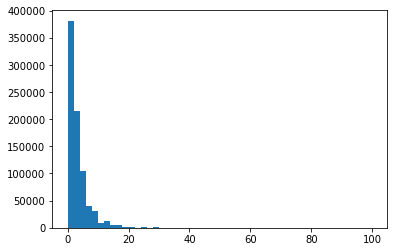

In [11]:
#now we have only positive price records left - let's have a look at their distribution
plt.hist(df.loc[(df["price"] >= 0) & (df["price"] < 100), "price"], bins = 50)
plt.show()

Most of the prices are less than 10, only very few records beyond 30, but there are a significant number of these records.

In [12]:
# look at countries
df["country"].nunique()
#df["country"].unique()

43

There are 43 viewers from countries. (production later: 32)

<AxesSubplot:>

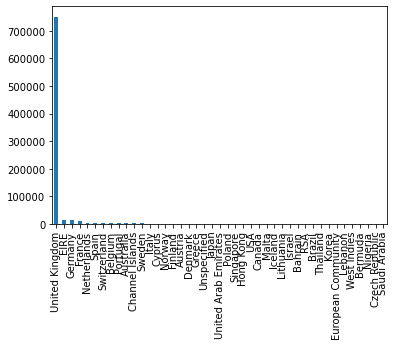

In [13]:
df["country"].value_counts().plot.bar()

The majority of records comes from UK, EIRE and Germany with fourty more countries as the long tail.

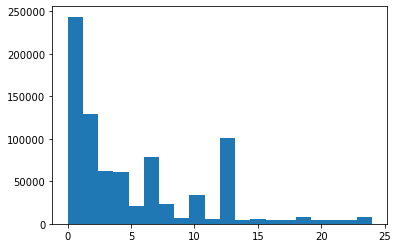

In [14]:
plt.hist(df["times_viewed"], bins = 20)
plt.show()

most of the records are viewerd low numbers

In [15]:
# calculate revenue by country as sum of price

pricesum = df.groupby(["country"]).sum().astype(int)
print(pricesum["price"].sort_values(ascending=False), "%d")


country
United Kingdom          3658065
EIRE                     107069
Germany                   49271
France                    40565
Norway                    38494
Spain                     16040
Hong Kong                 14452
Portugal                  13528
Singapore                 13175
Netherlands               12322
Belgium                   11190
Switzerland                9284
Sweden                     7876
Channel Islands            7610
Australia                  6872
Malta                      6085
Italy                      5910
Cyprus                     4976
Austria                    3390
Finland                    3364
RSA                        3105
Unspecified                3045
Greece                     2437
United Arab Emirates       2400
Denmark                    1818
Poland                     1510
USA                        1185
Japan                      1083
Canada                     1053
Iceland                     509
Lithuania                   494


as expected revenue distribution per country similar to number of records again with UK, EIRE, France and Germany providing highest numbers

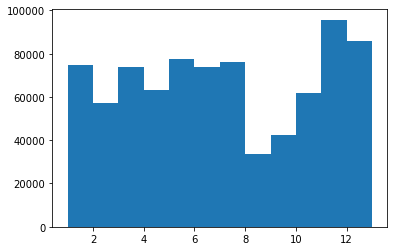

In [16]:
plt.hist(df["month"], bins=range(1,14))
plt.show()

Again, this makes sense, as we have two years of data for all but months 8, 9, and 10, so we would expect those to have lower counts.

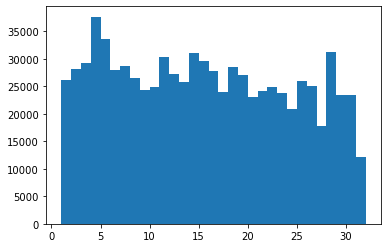

In [17]:
plt.hist(df["day"], bins=range(1,33))
plt.show()

fairly even distribution - last day of the month is lower as not all months have same length
high number of records averages things out

In [18]:
# create a datetime field with the date
df["date"] = pd.to_datetime(df["year"]*10000 + df["month"]*100 + df["day"], format='%Y%m%d')
df['day_of_week'] = df["date"].dt.day_name()
df.head()

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,date,day_of_week
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28,2017-11-28,Tuesday
1,United Kingdom,NaN,489597,8.65,22130,1,2017,11,28,2017-11-28,Tuesday
2,United Kingdom,NaN,489597,1.70,22132,6,2017,11,28,2017-11-28,Tuesday
3,United Kingdom,NaN,489597,1.70,22133,4,2017,11,28,2017-11-28,Tuesday
4,United Kingdom,NaN,489597,0.87,22134,1,2017,11,28,2017-11-28,Tuesday


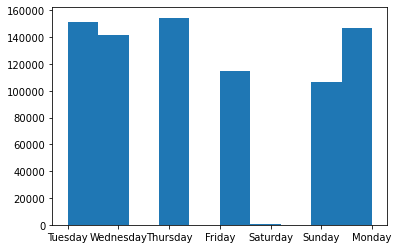

In [19]:
plt.hist(df["day_of_week"])
plt.show()

Interestingly the numbers for Saturday are unexpectedly low whilst for all other days the numbers are in the same range

In [20]:
print (df["day_of_week"].value_counts())

Thursday     154448
Tuesday      150976
Monday       146967
Wednesday    141391
Friday       114552
Sunday       106272
Saturday        402
Name: day_of_week, dtype: int64
